<a href="https://colab.research.google.com/github/gahz8212/python/blob/master/%EB%94%94%EC%A0%80%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [25]:
df=pd.read_csv('/content/drive/MyDrive/csv/dessert_sales_100.csv')
df

,temp,is_weekend,insta_posts,dessert_sales
0,21.018791,0,1,38
1,11.581205,1,1,30
2,10.217583,0,2,28
3,17.680240,0,3,48
4,21.547786,0,0,39
...,...,...,...,...
95,20.909141,0,2,45
96,8.475931,0,3,33
97,14.174155,1,2,41
98,10.539686,0,2,34


In [26]:
X=df.drop('dessert_sales',axis=1)
y=df['dessert_sales']
X.head()

,temp,is_weekend,insta_posts
0,21.018791,0,1
1,11.581205,1,1
2,10.217583,0,2
3,17.680240,0,3
4,21.547786,0,0


In [27]:
y.head()

,dessert_sales
0,38
1,30
2,28
3,48
4,39


In [28]:
df.dtypes


,0
temp,float64
is_weekend,int64
insta_posts,int64
dessert_sales,int64


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [30]:
model2 = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
model2.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 3
[LightGBM] [Info] Start training from score 38.450000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMRegressor(learning_rate=0.05, n_estimators=500, random_state=42)

In [31]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [33]:
r2_1=r2_score(y_test,y_pred)
r2_2=r2_score(y_test,y_pred2)
r2_3=r2_score(y_test,y_pred3)

In [34]:
print('랜덤포레스트_r2;',r2_1)
print('라이트gbm_r2;',r2_2)
print('리니어_r2;',r2_3 )

랜덤포레스트_r2; 0.7322143056719754
라이트gbm_r2; 0.6498179465263838
리니어_r2; 0.8070885921827001


In [35]:
print('랜덤포레스트_mae;',mean_absolute_error(y_test,y_pred))
print('라이트gbm_mae;',mean_absolute_error(y_test,y_pred2))
print('리니어_mae;',mean_absolute_error(y_test,y_pred3))

랜덤포레스트_mae; 2.717
라이트gbm_mae; 2.8545880947799724
리니어_mae; 2.3109267059365677


In [36]:
print('랜덤포레스트_rmse;',np.sqrt(mean_squared_error(y_test,y_pred)))
print('라이트gbm_rmse;',np.sqrt(mean_squared_error(y_test,y_pred2)))
print('리니어_rmse;',np.sqrt(mean_squared_error(y_test,y_pred3)))

랜덤포레스트_rmse; 3.095811686779414
라이트gbm_rmse; 3.540199951107384
리니어_rmse; 2.627603334938735


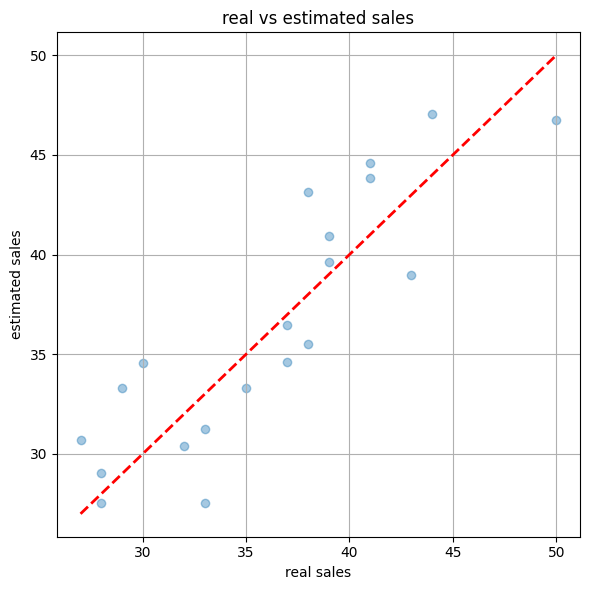

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

# 산점도: x축 실제, y축 예측
plt.scatter(y_test, y_pred, alpha=0.4)

# y = x 기준선 (완벽 예측선)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel("real sales")
plt.ylabel("estimated sales")
plt.title("real vs estimated sales")
plt.grid(True)
plt.tight_layout()
plt.show()

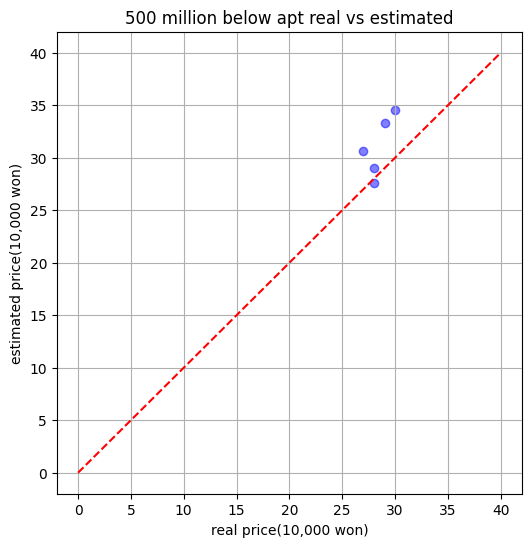

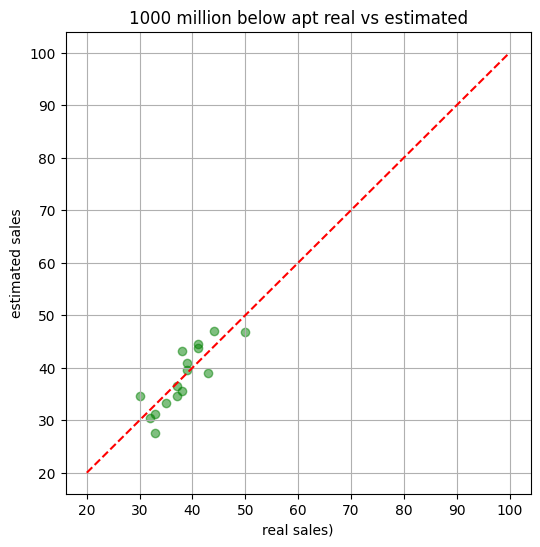

In [42]:
# 10건 이하(<=10)
mask_low = y_test <= 30

plt.figure(figsize=(6,6))
plt.scatter(y_test[mask_low], y_pred[mask_low], alpha=0.5, color='blue')
plt.plot([0, 40], [0, 40], 'r--')
plt.title("500 million below apt real vs estimated")
plt.xlabel("real price(10,000 won)")
plt.ylabel("estimated price(10,000 won)")
plt.grid(True)
plt.show()

# 30건 이상(>=30)
mask_high = y_test >= 30

plt.figure(figsize=(6,6))
plt.scatter(y_test[mask_high], y_pred[mask_high], alpha=0.5, color='green')
plt.plot([20, 100], [20, 100], 'r--')
plt.title("1000 million below apt real vs estimated")
plt.xlabel("real sales)")
plt.ylabel("estimated sales")
plt.grid(True)
plt.show()